In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import colorcet as cc

In [2]:
from ipywidgets import interact
from bokeh.models import MultiSelect

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, Slider, TextInput
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [28]:
cc.b_glasbey_bw


'#172a74'

In [6]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [7]:
!wget -O data/confirmed.csv $url_confirmed
!wget -O data/deaths.csv $url_death

--2020-04-28 17:20:26--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83660 (82K) [text/plain]
Saving to: ‘data/confirmed.csv’

data/confirmed.csv  100%[===================>]  81,70K  --.-KB/s    in 0,06s   

2020-04-28 17:20:26 (1,42 MB/s) - ‘data/confirmed.csv’ saved [83660/83660]

--2020-04-28 17:20:27--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP requ

In [8]:
df = pd.read_csv('data/confirmed.csv')

In [9]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27


In [10]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20',
       '4/24/20', '4/25/20', '4/26/20', '4/27/20'],
      dtype='object', length=101)

In [11]:
df[df['Country/Region']=='Germany'].sum(axis=0)

Province/State          0
Country/Region    Germany
Lat                    51
Long                    9
1/22/20                 0
                   ...   
4/23/20            153129
4/24/20            154999
4/25/20            156513
4/26/20            157770
4/27/20            158758
Length: 101, dtype: object

In [22]:
p.circle(-25, 25, radius=5, color=(0, 0, 0), alpha=0.8)

TypeError: 'LinearSegmentedColormap' object is not subscriptable

In [20]:
dict(zip(df['Country/Region'].unique(), cc.cm.glasbey_bw[:len(df['Country/Region'].unique())]))

TypeError: 'LinearSegmentedColormap' object is not subscriptable

In [13]:
df['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [15]:
df_sub = df[df['Country/Region']=='Germany']

In [37]:
absolute = df_sub[df.columns[4:]].sum(axis=0).to_frame(name='sum') 
new_cases = absolute.diff(axis=0).fillna(0)
new_cases_rolling = new_cases.rolling(window=7, axis=0).mean().fillna(0)

In [36]:
new_cases

,sum
1/22/20,0.0
1/23/20,0.0
1/24/20,4.0
1/25/20,2.0
1/26/20,0.0
...,...
4/16/20,25018.0
4/17/20,4078.0
4/18/20,38.0
4/19/20,9896.0


In [17]:
df_sub[df.columns[4:]].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         2
1/25/20         3
1/26/20         3
            ...  
4/16/20    147091
4/17/20    149130
4/18/20    149149
4/19/20    154097
4/20/20    156480
Length: 90, dtype: int64

In [12]:
absolute

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      5,      5,      5,
            5,      5,      5,      5,      5,      7,     11,     11,
           11,     11,     15,     18,     18,     20,     23,     28,
           28,     28,     28,     28,     43,     43,     51,     51,
           57,     61,     61,     72,     72,     77,     83,     83,
           83,     86,     86,     86,     86,     86,     96,     96,
           96,     97,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [46]:
def get_lines(country : str, rolling_window: int = 7):
    df_sub = df[df['Country/Region']==country]
    absolute = np.ravel(df_sub[df.columns[4:]].values)
    new_cases = np.ravel(df_sub[df.columns[4:]].diff(axis=1).fillna(0))
    new_cases_rolling = np.ravel(df_sub[df.columns[4:]].diff(axis=1).fillna(0).rolling(window=7, axis=1).mean().fillna(0))
    return absolute, new_cases, new_cases_rolling

In [38]:
absolute, new, new_rol =  get_lines('Germany')
x = list(range(0,len(new)))


In [39]:
source = ColumnDataSource(data=dict(x=x,absolute=absolute, new=new, new_rol=new_rol ))

In [40]:
source.data

{'x': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88],
 'absolute': array([     0,      0,      0,      0,      0,      1,      4,      4,
             4,      5,      8,     10,     12,     12,     12,     12,
            13,     13,     14,     14,     16,     16,     16,     16,
            16,     16,     16,     16,     16,     16,     16,     16,
            16,     16,     17,     27,     46,     48,     79,    130,
           159,    196,    262,    482,    670,    799,   1040,   1176,
          1457,   1908,   

In [27]:
p = figure(title="Newly Infected", plot_height=300, plot_width=600, y_range=(-100,100),
           background_fill_color='#efefef')
p.circle(-25, 25, radius=5, color=(0.1, 0.3, 0.61), alpha=0.8)


GlyphRenderer(id='1113', ...)

In [43]:
p = figure(title="Newly Infected", plot_height=300, plot_width=600, y_range=(-100,max(new)+100),
           background_fill_color='#efefef')
r = p.line('x', 'new', source=source, color="#8888cc", line_width=1.5, alpha=0.8)
r = p.line('x', 'new_rol',source=source, color="red", line_width=1.5, alpha=0.8)
#r = p.line('x', 'new_rol', color="red", line_width=1.5, alpha=0.8)
multi_select = MultiSelect(title="Option:", value=['Germany'],
                           options=conttries)

In [48]:
def update_data(attrname, old, new):
    country = multi_select.value
    absolute, new, new_rol  = get_lines(country)
    x = list(range(0,len(new)))
    source.data = dict(x=x,absolute=absolute, new=new, new_rol=new_rol )

In [49]:
multi_select.on_change('value',update_data )

In [50]:
show(multi_select,notebook_handle=True)
show(p, notebook_handle=True)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [52]:
source.data.keys()

dict_keys(['x', 'absolute', 'new', 'new_rol'])

In [40]:
df.columns[-1]

'4/20/20'

In [41]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/16/20             int64
4/17/20             int64
4/18/20             int64
4/19/20             int64
4/20/20             int64
Length: 94, dtype: object

In [168]:
from math import log10, log, ceil

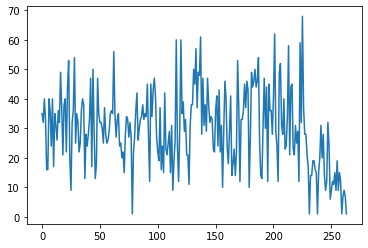

In [172]:
df[df.columns[-1]].apply(lambda x: ceil(log(x)*5) if x>1 else 1).plot()

In [63]:
[len(df)*1]

[264]

In [65]:
np.ones(len(df))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [71]:
circle_source = ColumnDataSource(dict(x=df["Long"].values,
                                      y=df["Lat"].values,
                                      sizes=np.ones(len(df))
                                      )
                                 )

In [72]:
circle_source.data

{'x': array([  65.      ,   20.1683  ,    1.6596  ,    1.5218  ,   17.8739  ,
         -61.7964  ,  -63.6167  ,   45.0382  ,  149.0124  ,  151.2093  ,
         130.8456  ,  153.4     ,  138.6007  ,  145.9707  ,  144.9631  ,
         115.8605  ,   14.5501  ,   47.5769  ,  -77.3963  ,   50.55    ,
          90.3563  ,  -59.5432  ,   27.9534  ,    4.      ,    2.3158  ,
          90.4336  ,  -63.5887  ,   17.6791  ,  -51.9253  ,  114.7277  ,
          25.4858  ,   -1.5616  ,  -23.0418  ,  104.9167  ,   11.5021  ,
        -116.5765  , -123.1207  , -122.6655  ,  -98.8139  ,  -66.4619  ,
         -57.6604  ,  -63.7443  ,  -85.3232  ,  -63.4168  ,  -73.5491  ,
        -106.4509  ,   20.9394  ,   18.7322  ,  -71.543   ,  117.2264  ,
         116.4142  ,  107.874   ,  117.9874  ,  101.0583  ,  113.4244  ,
         108.7881  ,  106.8748  ,  109.7453  ,  116.1306  ,  127.7615  ,
         113.614   ,  114.2     ,  112.2707  ,  111.7088  ,  113.9448  ,
         119.455   ,  115.7221  ,  126.1923  ,

In [76]:
np.ones(len(df))*df[df.columns[-1]]

0      1026.0
1       584.0
2      2718.0
3       717.0
4        24.0
        ...  
259       1.0
260       4.0
261       6.0
262       4.0
263       1.0
Name: 4/20/20, Length: 264, dtype: float64

In [130]:
 from pyproj import CRS

inProj = CRS("WGS84")
outProj =CRS("EPSG:3857")
#outProj = pyproj.Proj(init="EPSG:3857")

In [129]:
outProj

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [119]:
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:3857")


In [122]:
transformer

<Conversion Transformer: pipeline>
Description: Popular Visualisation Pseudo-Mercator
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)

In [121]:
transformer.transform(120,10)

(inf, inf)

In [103]:
inProj

Proj('+proj=longlat +datum=WGS84 +no_defs', preserve_units=True)

In [99]:
inProj = pyproj.Proj("epsg:4326")
outProj = pyproj.Proj("epsg:3857")

In [101]:
pyproj.transform(inProj,outProj,170,40)

(inf, inf)

In [11]:
l_test = ['Germany_confirmed_total_raw','Germany_confirmed_delta_raw', 'x']

In [12]:
[x for x in l_test if 'total' in x or 'x' in x]

['Germany_confirmed_total_raw', 'x']